# Assignment 3

## Task 0

In [22]:
import pandas as pd
data = pd.read_csv("iris_clusters.csv", delimiter=";")
data = data.dropna()
data.head()

,pl,pw,sl,sw,id
0,6.7,3.0,4.6,1.5,87.0
1,6.7,2.8,4.6,1.2,209.0
2,5.0,3.6,1.6,0.5,344.0
3,6.3,3.1,5.9,2.5,401.0
4,7.0,2.9,5.7,1.7,430.0


## Task 1

Cluster Counts:1    112
0    103
2     85
dtype: int64


/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


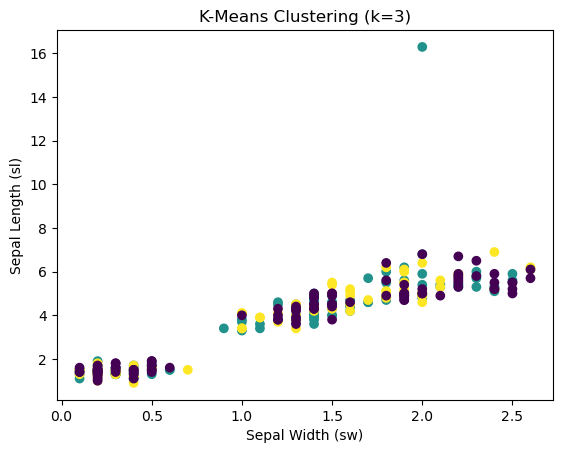

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data)

# Accessing cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
cluster_counts = pd.Series(labels).value_counts()
print(f"Cluster Counts:{cluster_counts}")
# Plotting the data using two features: "sw" (sepal width) and "sl" (sepal length)
plt.scatter(data["sw"], data["sl"], c=labels, cmap='viridis')
plt.xlabel('Sepal Width (sw)')
plt.ylabel('Sepal Length (sl)')
plt.title('K-Means Clustering (k=3)')
plt.show()

## Task 2

Number of records in each cluster after filtering outliers:
1    104
2    100
0     93
dtype: int64


/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


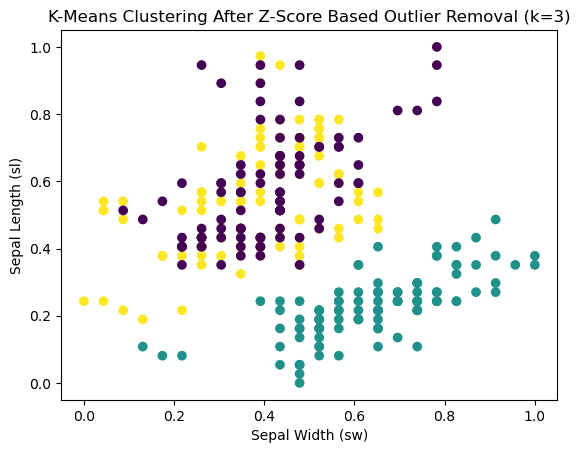

Cluster Labels: [2 2 1 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 2 1 1 2 2 1 1 2 2 1 1 2 2 2 2 1
 2 2 2 2 1 1 2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 1 2 2 2 1 1 1 1 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 2 1 2 1 2 2 2
 1 2 2 2 1 2 1 2 2 1 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 1 2 1 2 1 2 2 0
 0 0 0 2 0 1 1 0 1 2 0 0 0 2 0 0 1 1 1 2 0 0 2 0 1 0 0 0 0 1 1 1 0 0 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 0]
Cluster Centroids: [[0.58558559 0.41093969 0.69390681 0.69376344 0.79271685]
 [0.22817048 0.64172241 0.09070513 0.08076923 0.52730645]
 [0.54864865 0.38565217 0.62566667 0.6076     0.29484963]]


In [24]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 2) Outlier Detection using Z-score
# Compute Z-scores for each feature
z_scores = np.abs(zscore(data))

# Set a threshold for Z-scores (commonly 3 to detect outliers)
threshold = 3

# Identify rows where any feature's Z-score is greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter out the outliers
filtered_data = data[~outliers]
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(filtered_data), columns=data.columns)

# 3) K-Means clustering with k=3 after filtering out the outliers
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Accessing cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Find the number of records in each cluster
cluster_counts = pd.Series(labels).value_counts()

# Output the number of records in each cluster
print("Number of records in each cluster after filtering outliers:")
print(cluster_counts)

# Plotting the data using two features: "sw" (sepal width) and "sl" (sepal length)
plt.scatter(scaled_data["pw"], scaled_data["pl"], c=labels, cmap='viridis')
plt.xlabel('Sepal Width (sw)')
plt.ylabel('Sepal Length (sl)')
plt.title('K-Means Clustering After Z-Score Based Outlier Removal (k=3)')
plt.show()

# Output cluster labels and centroids for reference
print("Cluster Labels:", labels)
print("Cluster Centroids:", centroids)

## Task 3

/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

The optimal value of K is 2 with a Davies-Bouldin index of 0.7975564630703018


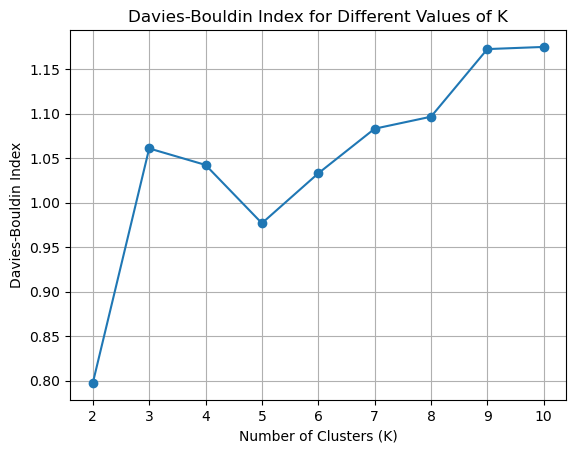

In [25]:
from sklearn.metrics import davies_bouldin_score
db_scores = []
# Loop through values of K from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    # Compute the Davies-Bouldin index
    db_index = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_index)

# Find the value of K with the lowest Davies-Bouldin index
optimal_k = np.argmin(db_scores) + 2  # +2 because we started from K=2
lowest_db_index = db_scores[optimal_k - 2]

# Output the results
print(f"The optimal value of K is {optimal_k} with a Davies-Bouldin index of {lowest_db_index}")

# Plot the Davies-Bouldin index for each K
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range(2, 11))
plt.grid()
plt.show()